##Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

from pathlib import Path
from PIL import Image
import os, shutil
from os import listdir
## Image Resizing
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##scaling and adding noise functions

In [ ]:
def preprocess(array):
     array = array.astype("float32") / 255.0
     return array

In [ ]:
def noise(array):
    

    noise_factor = 0.2
    noisy_array = array + noise_factor* np.random.normal(size=array.shape)

    return np.clip(noisy_array, 0.0, 1.0)

In [ ]:
def displaynoiseimg(array):
  fig = plt.figure(1,figsize=(15,15))
  for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = array[i]
    ax.imshow(arr)
    
plt.show()

In [ ]:
def display(array1, array2):
  # plt.imshow(array1)

    plt.imshow(array2)

    images = [array1,array2]

    for i, im in enumerate(images):
      plt.subplot(1,2,i+1)
      plt.imshow(im)

    # n = 10

    # indices = np.random.randint(len(array1), size=n)
    # images1 = array1[indices, :]
    # images2 = array2[indices, :]

    # plt.figure(figsize=(20, 4))
    # for i, (image1, image2) in enumerate(zip(images1, images2)):
    #     ax = plt.subplot(2, n, i + 1)
    #     plt.imshow(image1.reshape(3,128, 128))
    #     plt.gray()
    #     ax.get_xaxis().set_visible(False)
    #     ax.get_yaxis().set_visible(False)

    #     ax = plt.subplot(2, n, i + 1 + n)
    #     plt.imshow(image2.reshape(3,128, 128))
    #     plt.gray()
    #     ax.get_xaxis().set_visible(False)
    #     ax.get_yaxis().set_visible(False)

    

    plt.show()

##Assigning path of directory and appending the image

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "/content/drive/MyDrive/daisy"
train = os.path.join(base_dir, "daisy/")
test = os.path.join(base_dir, "test_daisy/")
validation=os.path.join(base_dir,"validation_daisy/")

##Rescaling images fromm sub directories and coverting it into array

In [ ]:
#training dataset reshaping
dim=(128,128)
X_image_train = []
for fname in listdir(train):
    fpath = os.path.join(train, fname)
    im = Image.open(fpath)
    im_resized = im.resize(dim)
    X_image_train.append(im_resized)

In [ ]:

## Converting the image of train  to numpy array
X_image_array=[]
for x in range(len(X_image_train)):
    X_image=np.array(X_image_train[x],dtype='uint8')
    X_image_array.append(X_image)
X_train_stacked=np.stack(X_image_array)

In [ ]:
#testing dataset reshaping
X_image_test = []
for fname1 in listdir(test):
    fpath1 = os.path.join(test, fname1)
    im1 = Image.open(fpath1)
    im_resized1 = im1.resize(dim)
    X_image_test.append(im_resized1)


In [ ]:
#testing dataset into array
X_image_array2=[]
for x in range(len(X_image_test)):
    X_image1=np.array(X_image_test[x],dtype='uint8')
    X_image_array2.append(X_image1)

X_test_stacked=np.stack(X_image_array2)

In [ ]:
X_image_array2

[array([[[186, 187,  64],
         [157, 159,  35],
         [108, 111,  21],
         ...,
         [ 14,  15,  13],
         [ 15,  17,  13],
         [ 21,  23,  17]],
 
        [[163, 166,  27],
         [112, 124,  10],
         [ 62,  81,  11],
         ...,
         [ 11,  16,   9],
         [ 13,  17,  11],
         [ 17,  18,  17]],
 
        [[131, 127,   5],
         [ 79,  84,   9],
         [ 46,  68,  11],
         ...,
         [ 14,  15,  11],
         [ 11,  15,  11],
         [ 13,  15,   9]],
 
        ...,
 
        [[ 41,  59,  28],
         [ 41,  57,  34],
         [ 75,  95,  53],
         ...,
         [ 15,  43,   6],
         [ 29,  51,   8],
         [ 22,  50,   7]],
 
        [[ 37,  53,  24],
         [ 32,  51,  21],
         [ 63,  90,  52],
         ...,
         [ 20,  40,   8],
         [ 24,  49,  11],
         [ 24,  49,   6]],
 
        [[ 41,  55,  25],
         [ 34,  50,  21],
         [ 65,  78,  50],
         ...,
         [ 22,  36,  10],
  

In [ ]:
##validation dataset
X_image_validation = []
for fname in listdir(validation):
    fpath = os.path.join(validation, fname)
    im = Image.open(fpath)
    im_resized = im.resize(dim)
    X_image_validation.append(im_resized)


In [ ]:
X_image_array3=[]
for x in range(len(X_image_validation)):
    X_image=np.array(X_image_validation[x],dtype='uint8')
    X_image_array3.append(X_image)

X_validation_stacked=np.stack(X_image_array3)

In [ ]:
#first it was list of arrays now it is arrays
X_image_array=np.asarray(X_image_array)

In [ ]:
X_image_array.shape

(536, 128, 128, 3)

In [ ]:
X_image_array2=np.asarray(X_image_array2)

In [ ]:
X_image_array2.shape

(152, 128, 128, 3)

In [ ]:
X_image_array3=np.asarray(X_image_array3)

In [ ]:
X_image_array3.shape

(76, 128, 128, 3)

##Preprocessing and adding noise in the images

In [ ]:
train_data_preprocess=preprocess(X_image_array)
test_data_preprocess=preprocess(X_image_array2)
validation_data_preprocess=preprocess(X_image_array3)

In [ ]:
train_data_noise=noise(train_data_preprocess)
test_data_noise=noise(test_data_preprocess)
validation_data_noise=noise(validation_data_preprocess)

In [ ]:
train_data_preprocess.shape

(536, 128, 128, 3)

In [ ]:
train_data_preprocess[0].shape

(128, 128, 3)

In [ ]:

train_data_preprocess_1=train_data_preprocess[0].transpose(2,0,1)

train_noise_preprocess_1=train_data_noise[0].transpose(2,0,1)



In [ ]:
train_data_preprocess_1.shape

(3, 128, 128)

In [ ]:
train_data_preprocess.shape

(536, 128, 128, 3)

In [ ]:
train_data_preprocess

array([[[[0.04313726, 0.0627451 , 0.03529412],
         [0.04313726, 0.0627451 , 0.03529412],
         [0.04705882, 0.0627451 , 0.03529412],
         ...,
         [0.21960784, 0.16862746, 0.05882353],
         [0.19607843, 0.15686275, 0.05882353],
         [0.22352941, 0.16470589, 0.06666667]],

        [[0.04313726, 0.05882353, 0.03137255],
         [0.03921569, 0.05882353, 0.03137255],
         [0.03921569, 0.05882353, 0.03137255],
         ...,
         [0.21960784, 0.17254902, 0.0627451 ],
         [0.22352941, 0.1764706 , 0.05882353],
         [0.2509804 , 0.19215687, 0.0627451 ]],

        [[0.04705882, 0.05882353, 0.03137255],
         [0.03921569, 0.05490196, 0.02745098],
         [0.04313726, 0.05490196, 0.02745098],
         ...,
         [0.22352941, 0.18431373, 0.07058824],
         [0.23137255, 0.19215687, 0.07058824],
         [0.27450982, 0.20392157, 0.07450981]],

        ...,

        [[0.85882354, 0.80784315, 0.88235295],
         [0.85882354, 0.8117647 , 0.8666667 ]

In [ ]:
tn=noise(train_data_noise[0]
                         )

In [ ]:
tn - train_data_noise[0]

array([[[ 2.33546557e-01,  2.21199629e-01, -3.32992374e-03],
        [ 3.45554587e-01,  2.17040877e-01,  0.00000000e+00],
        [-7.31263814e-03, -3.46648942e-03,  1.59431040e-01],
        ...,
        [-1.22269379e-01, -9.34982595e-02, -1.07271611e-01],
        [-1.19094275e-01,  8.81136849e-02,  2.33485045e-01],
        [ 2.22608113e-01, -2.87984425e-02,  3.29925380e-01]],

       [[ 0.00000000e+00,  1.65477592e-02,  1.36009126e-01],
        [ 2.88326035e-01,  0.00000000e+00,  1.15811338e-01],
        [-1.27329746e-01,  1.80742308e-01,  1.98601136e-01],
        ...,
        [-3.72989051e-02, -1.85139252e-01,  0.00000000e+00],
        [ 1.44383518e-01, -5.51590175e-02,  0.00000000e+00],
        [-2.23578052e-01,  1.56394752e-01,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.65627714e-02,  1.99271072e-01,  0.00000000e+00],
        [ 3.46216334e-02,  2.51853011e-02,  1.99916527e-02],
        ...,
        [ 1.56147379e-01, -1.82281671e-02,

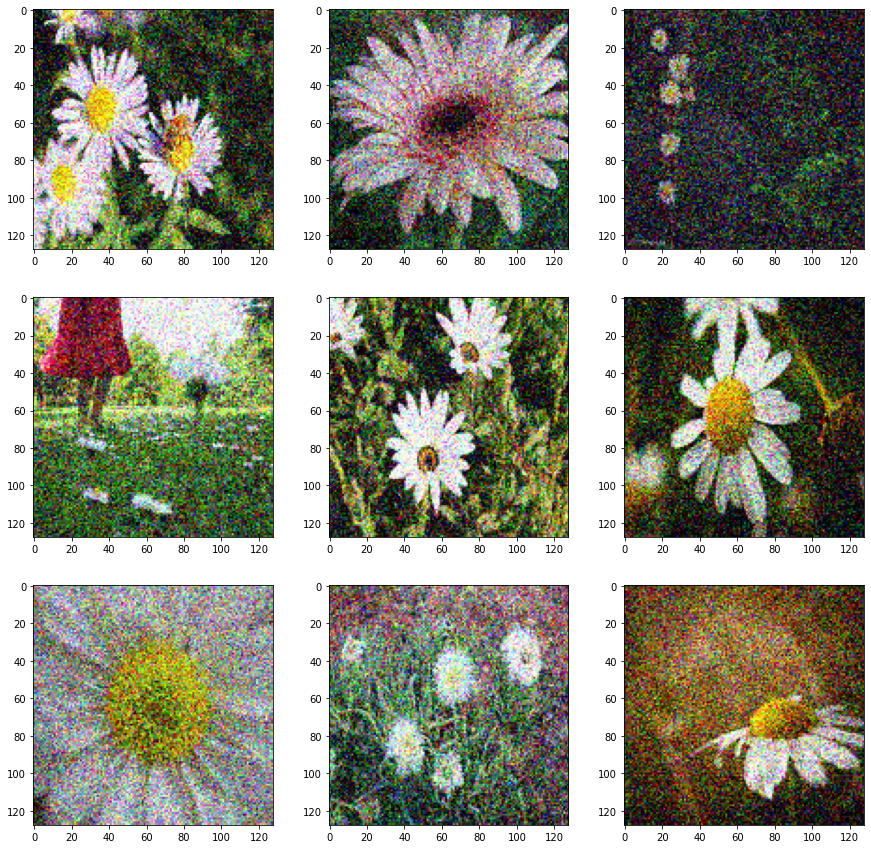

In [ ]:
displaynoiseimg(train_data_noise)


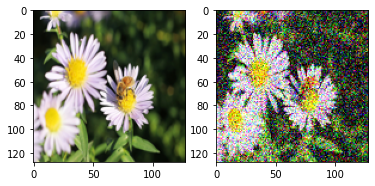

In [ ]:
display(train_data_preprocess[0],tn)



##Encoder and Decoder

In [ ]:
from tensorflow.keras import layers
input = layers.Input(shape=(128, 128, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu",)(input)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(3, (1, 1), activation="relu", )(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (1, 1), activation="relu")(x)
x = layers.Conv2DTranspose(3, (3, 3), activation="relu")(x)
# x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 3)       99        
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 126, 126, 32)     128       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 128, 128, 3)      867       
 ranspose)                                                       
                                                                 
Total params: 1,990
Trainable params: 1,990
Non-trainable p

In [ ]:
autoencoder.fit(
    x=train_data_preprocess,
    y=train_data_preprocess,
    epochs=50,
    batch_size=128,
    shuffle=True,
    
    
    validation_data=(validation_data_preprocess,validation_data_preprocess),
)

Epoch 1/50
5/5 [==============================] - 12s 2s/step - loss: 2.5607 - val_loss: 1.1308
Epoch 2/50
5/5 [==============================] - 14s 3s/step - loss: 0.9674 - val_loss: 0.7194
Epoch 3/50
5/5 [==============================] - 14s 2s/step - loss: 0.6627 - val_loss: 0.5684
Epoch 4/50
5/5 [==============================] - 12s 2s/step - loss: 0.5719 - val_loss: 0.5463
Epoch 5/50
5/5 [==============================] - 12s 2s/step - loss: 0.5334 - val_loss: 0.5054
Epoch 6/50
5/5 [==============================] - 11s 2s/step - loss: 0.5107 - val_loss: 0.5024
Epoch 7/50
5/5 [==============================] - 11s 2s/step - loss: 0.5101 - val_loss: 0.5039
Epoch 8/50
5/5 [==============================] - 14s 3s/step - loss: 0.5106 - val_loss: 0.5042
Epoch 9/50
5/5 [==============================] - 11s 2s/step - loss: 0.5102 - val_loss: 0.5023
Epoch 10/50
5/5 [==============================] - 11s 2s/step - loss: 0.5078 - val_loss: 0.4988
Epoch 11/50
5/5 [======================

In [ ]:
predictions = autoencoder.predict(test_data_preprocess)

predictions.shape


5/5 [==============================] - 1s 209ms/step


(152, 128, 128, 3)

In [ ]:
display(test_data_preprocess[0], predictions[0])

array([[[0.7294118 , 0.73333335, 0.2509804 ],
        [0.6156863 , 0.62352943, 0.13725491],
        [0.42352942, 0.43529412, 0.08235294],
        ...,
        [0.05490196, 0.05882353, 0.05098039],
        [0.05882353, 0.06666667, 0.05098039],
        [0.08235294, 0.09019608, 0.06666667]],

       [[0.6392157 , 0.6509804 , 0.10588235],
        [0.4392157 , 0.4862745 , 0.03921569],
        [0.24313726, 0.31764707, 0.04313726],
        ...,
        [0.04313726, 0.0627451 , 0.03529412],
        [0.05098039, 0.06666667, 0.04313726],
        [0.06666667, 0.07058824, 0.06666667]],

       [[0.5137255 , 0.49803922, 0.01960784],
        [0.30980393, 0.32941177, 0.03529412],
        [0.18039216, 0.26666668, 0.04313726],
        ...,
        [0.05490196, 0.05882353, 0.04313726],
        [0.04313726, 0.05882353, 0.04313726],
        [0.05098039, 0.05882353, 0.03529412]],

       ...,

       [[0.16078432, 0.23137255, 0.10980392],
        [0.16078432, 0.22352941, 0.13333334],
        [0.29411766, 0

array([[[0.1127152 , 0.08476064, 0.03346686],
        [0.10328785, 0.06249154, 0.        ],
        [0.12449367, 0.11556046, 0.03154061],
        ...,
        [0.03735336, 0.04354375, 0.02916377],
        [0.01473426, 0.01923206, 0.01476676],
        [0.01042407, 0.01777228, 0.01126307]],

       [[0.11687931, 0.13936217, 0.05517119],
        [0.14117418, 0.14699604, 0.00771777],
        [0.20455879, 0.19491357, 0.01322441],
        ...,
        [0.06153242, 0.06660208, 0.03183374],
        [0.03004009, 0.02971342, 0.01436407],
        [0.0171184 , 0.02251063, 0.01258612]],

       [[0.16226724, 0.14339738, 0.06113138],
        [0.20426378, 0.22298105, 0.        ],
        [0.29526755, 0.2760284 , 0.0353526 ],
        ...,
        [0.07074454, 0.08584572, 0.0457527 ],
        [0.03333991, 0.03809121, 0.01749627],
        [0.01964961, 0.02230024, 0.01770695]],

       ...,

       [[0.10043005, 0.10491313, 0.07122655],
        [0.18718958, 0.21642552, 0.0981156 ],
        [0.27223238, 0

In [ ]:
test_data_preprocess.shape

(152, 128, 128, 3)

In [ ]:
autoencoder.fit(
    x=train_data_noise,
    y=train_data_preprocess,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data_preprocess,test_data_preprocess),
)

Epoch 1/100
5/5 [==============================] - 13s 2s/step - loss: 0.4786 - val_loss: 0.4891
Epoch 2/100
5/5 [==============================] - 12s 2s/step - loss: 0.4786 - val_loss: 0.4891
Epoch 3/100
5/5 [==============================] - 12s 2s/step - loss: 0.4784 - val_loss: 0.4897
Epoch 4/100
5/5 [==============================] - 12s 2s/step - loss: 0.4784 - val_loss: 0.4898
Epoch 5/100
5/5 [==============================] - 12s 2s/step - loss: 0.4782 - val_loss: 0.4893
Epoch 6/100
5/5 [==============================] - 16s 3s/step - loss: 0.4780 - val_loss: 0.4906
Epoch 7/100
5/5 [==============================] - 12s 2s/step - loss: 0.4779 - val_loss: 0.4907
Epoch 8/100
5/5 [==============================] - 12s 2s/step - loss: 0.4779 - val_loss: 0.4917
Epoch 9/100
5/5 [==============================] - 12s 2s/step - loss: 0.4778 - val_loss: 0.4921
Epoch 10/100
5/5 [==============================] - 12s 2s/step - loss: 0.4777 - val_loss: 0.4929
Epoch 11/100
5/5 [===========

5/5 [==============================] - 1s 223ms/step


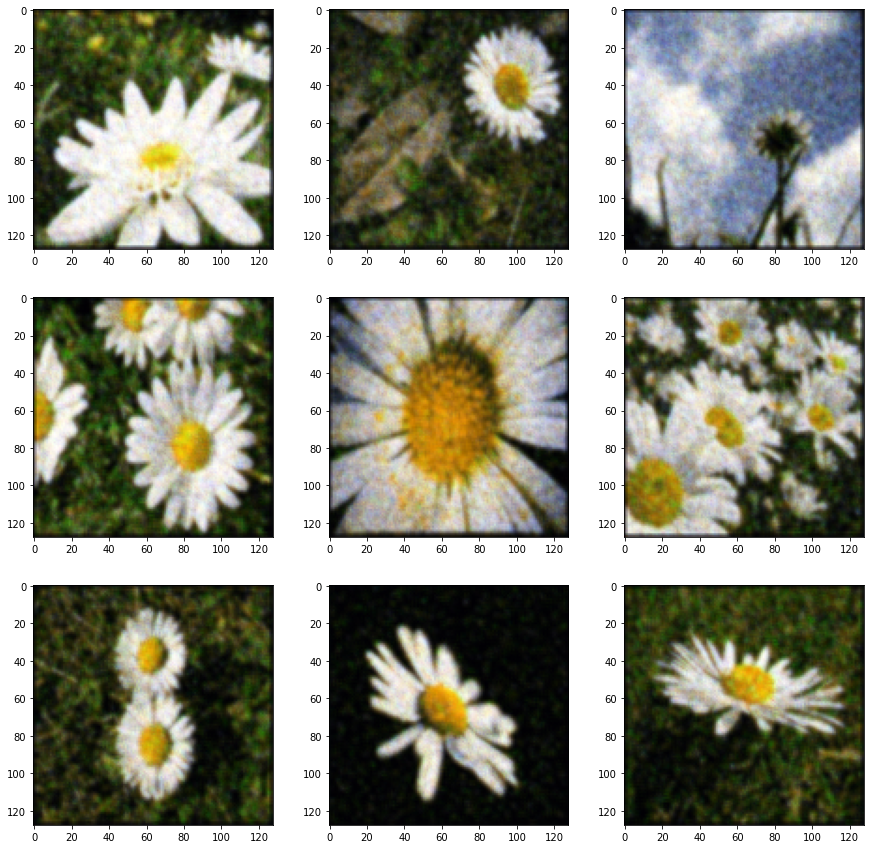

In [ ]:
predictions = autoencoder.predict(test_data_noise)
displaynoiseimg(predictions)

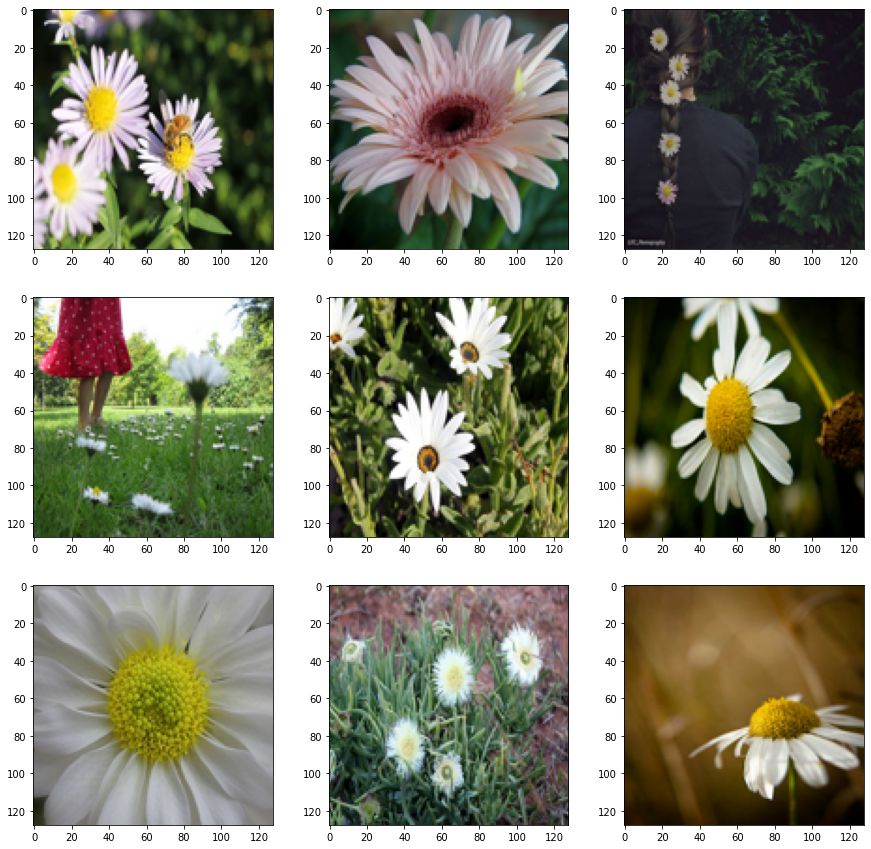

In [ ]:
displaynoiseimg(train_data_preprocess)

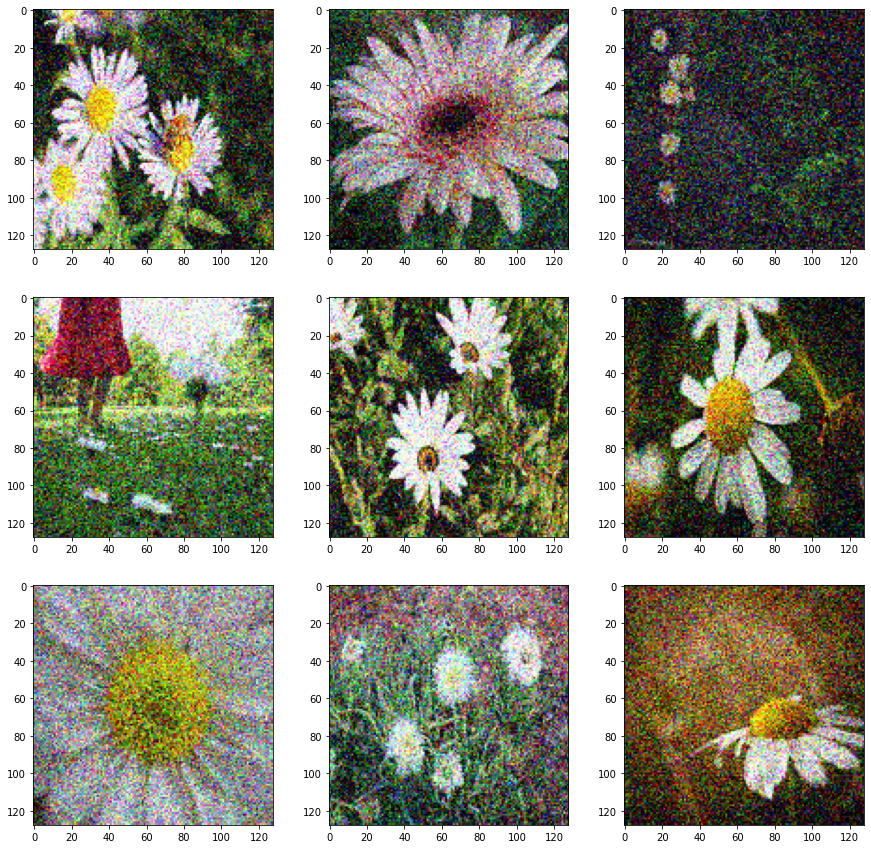

In [ ]:
displaynoiseimg(train_data_noise)

In [ ]:



from tensorflow.keras.models import load_model

autoencoder.save('model.h5')